**SIMPLE AND MULTIPLE LINEAR REGRESSION**

In [ ]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, shapiro
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import probplot

# STEP 2: LOAD DATA

df = pd.read_excel("/content/hypertension_data.xlsx")
y = df["SystolicBP"]
print("Data Loaded Successfully!")
print(f"Shape: {df.shape}\n")
print(df.head())



Data Loaded Successfully!
Shape: (250, 10)

   Age        BMI  WaistCircumference  PhysicalActivity_MinWeek  \
0   46  29.612193           67.919282                147.777845   
1   59  31.410750           71.542219                175.766895   
2   54  19.600788           39.069568                216.439434   
3   50  31.674525           67.772248                160.557399   
4   47  23.058473           48.759053                 69.622290   

   SaltIntake_gDay  StressScore     Sex Smoking Diabetes  SystolicBP  
0         8.022654     6.005565    Male      No      Yes  233.341594  
1         7.323921     9.240859  Female      No       No  224.443983  
2         8.883949     7.244794  Female     Yes      Yes  221.521765  
3         8.175213     6.116803    Male     Yes       No  240.423064  
4         8.122148     6.179216  Female      No      Yes  210.428960  


In [ ]:
# STEP 3: SIMPLE CORRELATION

print("="*60)
print("SIMPLE CORRELATION: StressScore vs SystolicBP")
print("="*60)
r_simple, p_simple = pearsonr(df["StressScore"], y)
print(f"r = {r_simple:.3f} | p-value = {p_simple:.6f}")

SIMPLE CORRELATION: StressScore vs SystolicBP
r = 0.407 | p-value = 0.000000



SIMPLE LINEAR REGRESSION
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     49.36
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           2.05e-11
Time:                        15:08:11   Log-Likelihood:                -1011.4
No. Observations:                 250   AIC:                             2027.
Df Residuals:                     248   BIC:                             2034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         207.4490  

/tmp/ipython-input-974705440.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nRegression Equation: SystolicBP = {simple_model.params[1]:.3f} * StressScore + {simple_model.params[0]:.3f}")


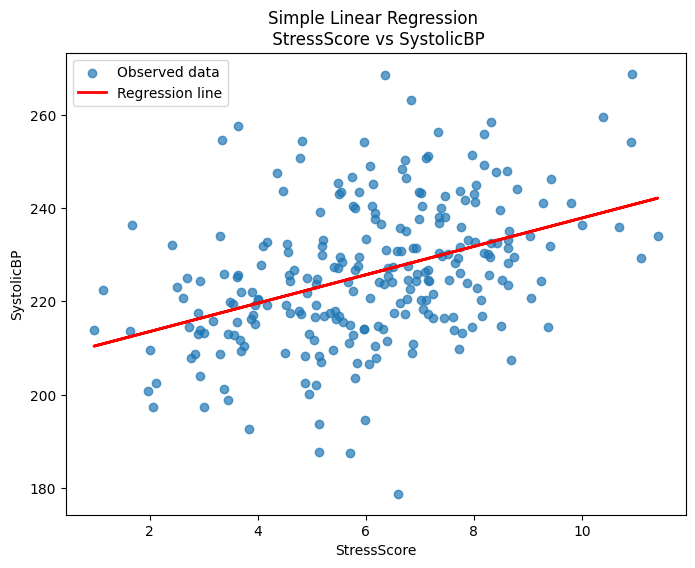

In [ ]:
# STEP 4: SIMPLE LINEAR REGRESSION

print("\n" + "="*60)
print("SIMPLE LINEAR REGRESSION")
print("="*60)
X_simple = sm.add_constant(df[["StressScore"]])
simple_model = sm.OLS(y, X_simple).fit()

print(simple_model.summary())
print(f"\nRegression Equation: SystolicBP = {simple_model.params[1]:.3f} * StressScore + {simple_model.params[0]:.3f}")

# SLR PLOT
plt.figure(figsize=(8, 6))
plt.scatter(df["StressScore"], y, alpha=0.7, label="Observed data")
plt.plot(df["StressScore"],
         simple_model.predict(X_simple),
         color="red",
         linewidth=2,
         label="Regression line")

plt.xlabel("StressScore")
plt.ylabel("SystolicBP")
plt.title("Simple Linear Regression \n StressScore vs SystolicBP")
plt.legend()
plt.show()




MULTIPLE CORRELATION ANALYSIS
Age                       → r =  0.306  p = 0.000001
BMI                       → r =  0.624  p = 0.000000
WaistCircumference        → r =  0.615  p = 0.000000
PhysicalActivity_MinWeek  → r =  0.051  p = 0.422900
SaltIntake_gDay           → r =  0.187  p = 0.002923
StressScore               → r =  0.407  p = 0.000000


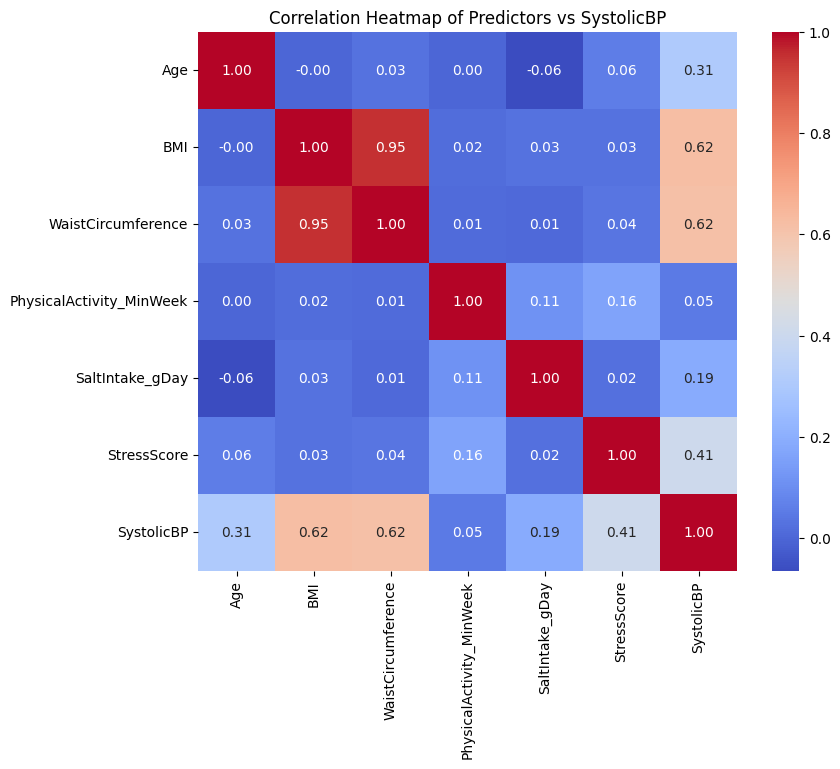

In [ ]:
# STEP 5: MULTIPLE CORRELATION

predictors = ["Age", "BMI", "WaistCircumference", "PhysicalActivity_MinWeek", "SaltIntake_gDay", "StressScore"]
print("\n" + "="*60)
print("MULTIPLE CORRELATION ANALYSIS")
print("="*60)

significant_predictors = []
for col in predictors:
    r, p = pearsonr(df[col], y)
    print(f"{col:25} → r = {r:6.3f}  p = {p:.6f}")
    if abs(r) >= 0.3:
        significant_predictors.append(col)

# HEATMAP: Correlation Matrix
plt.figure(figsize=(9, 7))
corr_matrix = df[predictors + ["SystolicBP"]].corr()

sns.heatmap(corr_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            square=True)

plt.title("Correlation Heatmap of Predictors vs SystolicBP")
plt.show()

In [ ]:
# STEP 6: MULTIPLE LINEAR REGRESSION
# (BEFORE & AFTER MULTICOLLINEARITY CORRECTION)

print("\n" + "="*70)
print("MULTIPLE LINEAR REGRESSION: BEFORE & AFTER MULTICOLLINEARITY CORRECTION")
print("="*70)

# STEP 6A: MLR BEFORE CORRECTION
print("\nMULTIPLE LINEAR REGRESSION (BEFORE CORRECTION)")
X_before = df[["Age", "BMI", "WaistCircumference", "PhysicalActivity_MinWeek", "SaltIntake_gDay", "StressScore"]]
X_before_sm = sm.add_constant(X_before)

model_before = sm.OLS(y, X_before_sm).fit()
print(model_before.summary())

print(f"R-squared: {model_before.rsquared:.3f}")
print(f"Adjusted R-squared: {model_before.rsquared_adj:.3f}")
print(f"Overall model p-value: {model_before.f_pvalue:.6f}")

# VIF BEFORE correction
print("\n VIF BEFORE CORRECTION:")
vif_before = pd.DataFrame()
vif_before["Variable"] = X_before_sm.columns
vif_before["VIF"] = [
    variance_inflation_factor(X_before_sm.values, i)
    for i in range(X_before_sm.shape[1])
]
print(vif_before.round(2))
print("→ High VIF indicates multicollinearity (assumption violated)")




MULTIPLE LINEAR REGRESSION: BEFORE & AFTER MULTICOLLINEARITY CORRECTION

MULTIPLE LINEAR REGRESSION (BEFORE CORRECTION)
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     77.58
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           1.13e-53
Time:                        15:15:12   Log-Likelihood:                -900.38
No. Observations:                 250   AIC:                             1815.
Df Residuals:                     243   BIC:                             1839.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.9


 !!! APPLYING MULTICOLLINEARITY CORRECTION !!!

 MULTIPLE LINEAR REGRESSION (AFTER CORRECTION)
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           2.99e-50
Time:                        15:17:16   Log-Likelihood:                -915.92
No. Observations:                 250   AIC:                             1840.
Df Residuals:                     246   BIC:                             1854.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

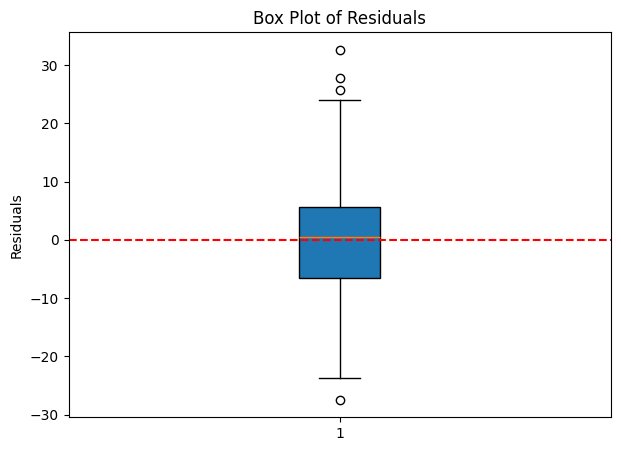

In [ ]:
# STEP 6B: MULTICOLLINEARITY CORRECTION
print("\n !!! APPLYING MULTICOLLINEARITY CORRECTION !!!")
df["BodyFat_Index"] = (df["BMI"] + df["WaistCircumference"]) / 2


# STEP 6C: MLR AFTER CORRECTION (FINAL MODEL)
print("\n MULTIPLE LINEAR REGRESSION (AFTER CORRECTION)")

X_final = df[["Age", "StressScore", "BodyFat_Index"]]
X_final_sm = sm.add_constant(X_final)

final_model = sm.OLS(y, X_final_sm).fit()
print(final_model.summary())
print(f"R-squared: {final_model.rsquared:.3f}")
print(f"Adjusted R-squared: {final_model.rsquared_adj:.3f}")
print(f"Overall model p-value: {final_model.f_pvalue:.6f}")

# VIF AFTER correction
print("\nVIF AFTER CORRECTION:")
vif_after = pd.DataFrame()
vif_after["Variable"] = X_final_sm.columns
vif_after["VIF"] = [
    variance_inflation_factor(X_final_sm.values, i)
    for i in range(X_final_sm.shape[1])
]
print(vif_after.round(2))
print("→ All VIF values acceptable (assumption satisfied)")

# BOX PLOT: Residuals (FINAL MODEL)
residuals_final = final_model.resid

plt.figure(figsize=(7, 5))
plt.boxplot(residuals_final, vert=True, patch_artist=True)
plt.axhline(0, color="red", linestyle="--")
plt.ylabel("Residuals")
plt.title("Box Plot of Residuals")
plt.show()


ASSUMPTION CHECKS - FINAL MODEL
Durbin-Watson (Independence) : 2.045
Breusch-Pagan p-value        : 0.0660
Shapiro-Wilk p-value         : 0.1684

Outliers Detected: 4 (1.6%)
 ->If >5%, consider removing; here it's normal for health data.


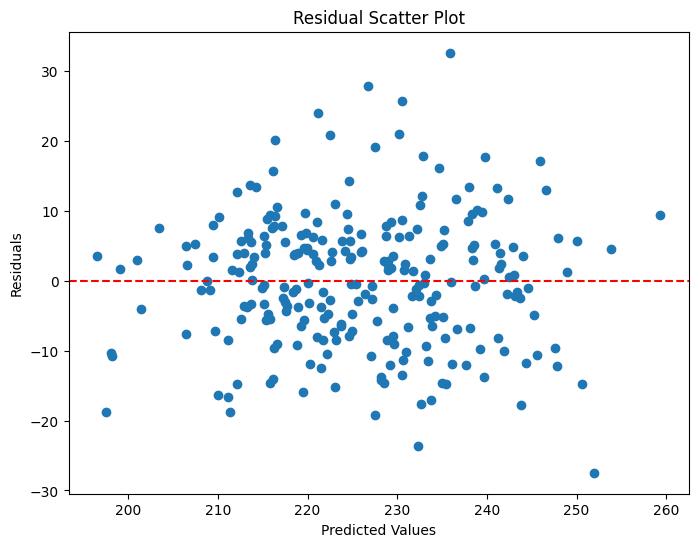

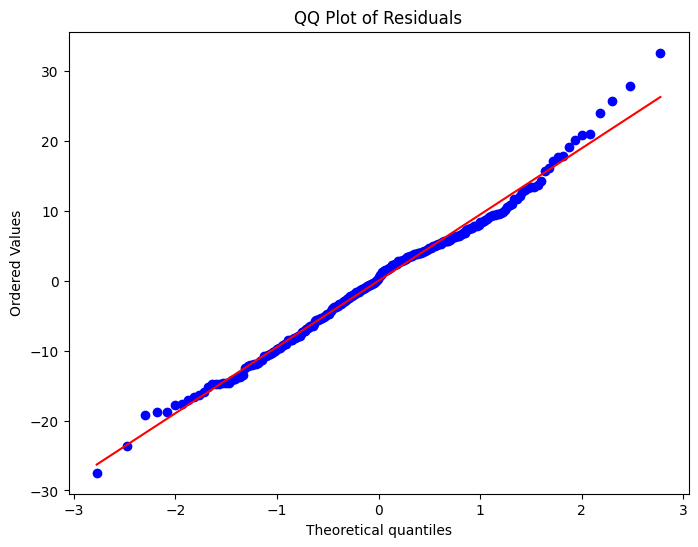

In [ ]:
# STEP 7: ASSUMPTION CHECKS (Final Model)

residuals = final_model.resid
y_pred = final_model.fittedvalues

print("\nASSUMPTION CHECKS - FINAL MODEL")
# Define X_const for Breusch-Pagan test
X_const = sm.add_constant(X_final)
print(f"Durbin-Watson (Independence) : {durbin_watson(residuals):.3f}")
print(f"Breusch-Pagan p-value        : {het_breuschpagan(residuals, X_const)[1]:.4f}")
print(f"Shapiro-Wilk p-value         : {shapiro(residuals)[1]:.4f}")

# Outlier Detection (IQR Method)
Q1 = np.quantile(residuals, 0.25)
Q3 = np.quantile(residuals, 0.75)
IQR = Q3 - Q1

outliers = residuals[(residuals < (Q1 - 1.5 * IQR)) | (residuals > (Q3 + 1.5 * IQR))]
print(f"\nOutliers Detected: {len(outliers)} ({len(outliers)/len(residuals)*100:.1f}%)")
print(" ->If >5%, consider removing; here it's normal for health data.")

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Scatter Plot")
plt.show()

# QQ Plot
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

In [ ]:
# STEP 8: INTERPRETATION
print("\n" + "="*60)
print("MODEL INTERPRETATION")
print("="*60)

# Model Explanation
print(f"R² = {final_model.rsquared:.3f} (Adjusted = {final_model.rsquared_adj:.3f}): Explains {final_model.rsquared*100:.0f}% of variance in SystolicBP.")
print(f"- Intercept: {final_model.params[0]:.0f} mmHg (baseline).")
print(f"- Age: {final_model.params[1]:+.2f} mmHg/year (p={final_model.pvalues[1]:.3f}, {"significant" if final_model.pvalues[1] < 0.05 else "not significant"}).")
print(f"- StressScore: {final_model.params[2]:+.2f} mmHg/point (p={final_model.pvalues[2]:.3f}, {"significant" if final_model.pvalues[2] < 0.05 else "not significant"}).")
print(f"- BodyFat_Index: {final_model.params[3]:+.2f} mmHg/unit (p={final_model.pvalues[3]:.3f}, {"significant" if final_model.pvalues[3] < 0.05 else "not significant"}).")

# Assumption Checks
dw = durbin_watson(residuals)
bp_p = het_breuschpagan(residuals, X_const)[1]
sw_p = shapiro(residuals)[1]
outlier_pct = len(outliers)/len(residuals)*100
vif_max = vif_after["VIF"][1:].max()  # Exclude const

print("\nAssumptions:")
print(f"- Independence: {"SATISFIED" if 1.5 <= dw <= 2.5 else "Issue"} (DW={dw:.1f}).")
print(f"- Homoscedasticity: {"SATISFIED" if bp_p > 0.05 else "Issue"} (BP p={bp_p:.4f}).")
print(f"- Normality: {"SATISFIED" if sw_p > 0.05 else "Issue"} (SW p={sw_p:.4f}).")
print(f"- Multicollinearity: {"SATISFIED" if vif_max < 5 else "Issue"} (Max VIF={vif_max:.1f}).")
print(f"- Outliers: {outlier_pct:.1f}% ({"Low" if outlier_pct < 5 else "High"}).")

# Overall Conclusion
strength = "strong" if final_model.rsquared > 0.5 else "moderate" if final_model.rsquared > 0.3 else "weak"
assumptions_met = (1.5 <= dw <= 2.5) and (bp_p > 0.05) and (sw_p > 0.05) and (vif_max < 5) and (outlier_pct < 5)
print(f"\nSummary: {strength.capitalize()} predictors for BP. {"All assumptions met." if assumptions_met else "Some issues - caution advised."}")

# Recommendation
print("\n" + "="*60)
print("FINAL RECOMMENDATION")
print("="*60)
print("→ Use this Final Model with BodyFat_Index")
print(f"→ R-squared = {final_model.rsquared:.3f} | Adjusted R-squared = {final_model.rsquared_adj:.3f}")


MODEL INTERPRETATION
R² = 0.612 (Adjusted = 0.607): Explains 61% of variance in SystolicBP.
- Intercept: 122 mmHg (baseline).
- Age: +0.67 mmHg/year (p=0.000, significant).
- StressScore: +2.76 mmHg/point (p=0.000, significant).
- BodyFat_Index: +1.26 mmHg/unit (p=0.000, significant).

Assumptions:
- Independence: SATISFIED (DW=2.0).
- Homoscedasticity: SATISFIED (BP p=0.0660).
- Normality: SATISFIED (SW p=0.1684).
- Multicollinearity: SATISFIED (Max VIF=1.0).
- Outliers: 1.6% (Low).

Summary: Strong predictors for BP. All assumptions met.

FINAL RECOMMENDATION
→ Use this Final Model with BodyFat_Index
→ R-squared = 0.612 | Adjusted R-squared = 0.607


/tmp/ipython-input-618205428.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- Intercept: {final_model.params[0]:.0f} mmHg (baseline).")
/tmp/ipython-input-618205428.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- Age: {final_model.params[1]:+.2f} mmHg/year (p={final_model.pvalues[1]:.3f}, {"significant" if final_model.pvalues[1] < 0.05 else "not significant"}).")
/tmp/ipython-input-618205428.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va